In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [2]:
perfomances_dt5 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt5.rds")[None] # also works for RData
perfomances_dt5
# baselevel_p = perfomances_dt5[(perfomances_dt5['NRT'] == 'static') & (perfomances_dt5['policy'] == 'leach_0')]['P'].to_numpy()[0]
# perfomances_dt5['P_dlt'] = perfomances_dt5['P']-baselevel_p
# # CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
# baselevel_y = perfomances_dt5[(perfomances_dt5['NRT'] == 'static') & (perfomances_dt5['policy'] == 'leach_0')]['Y_corn'].to_numpy()[0]
# perfomances_dt5['Y_corn_pct'] = perfomances_dt5['Y_corn']/baselevel_y

# # #Keep change in Y >= 95%
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] >= 0.95]
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] <= 1.05]

# # #Calculate ag-sector cost
# perfomances_dt5['C'] = - perfomances_dt5['P_dlt'] - perfomances_dt5['G']
perfomances_dt5['policy_cost'] = -perfomances_dt5['policy_cost']
perfomances_dt5['L_change'] = -perfomances_dt5['L_change']
# perfomances_dt5[perfomances_dt5['policy_name'] == 'ratio']
perfomances_dt5

,policy,NRT,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
0,ratio_5,static,12725.625456,40.688975,187.175828,1650.564484,0.000000,-0.0,1650.564484,-0.000000,5.0,ratio
1,ratio_5,dynamic,12670.669425,37.990202,175.820280,1650.819523,0.000000,6.6,1650.819523,0.255039,5.0,ratio
2,ratio_5,rfranger,12668.264590,37.863839,175.432204,1650.754500,0.000000,6.9,1650.754500,0.190016,5.0,ratio
3,ratio_5,expost,12854.479488,38.103308,181.206988,1672.782236,0.000000,6.4,1672.782236,22.217752,5.0,ratio
4,ratio_6,static,12663.831875,38.172939,177.752539,1623.624330,24.885355,6.2,1648.509685,-2.054799,6.0,ratio
...,...,...,...,...,...,...,...,...,...,...,...,...
255,lag_45,static,12247.505235,30.815687,144.610320,1613.423509,0.000000,24.3,1613.423509,-37.140976,45.0,lag
256,lag_45,dynamic,12090.282694,29.280268,135.055243,1598.100907,0.000000,28.0,1598.100907,-52.463578,45.0,lag
257,lag_45,expost,12854.479488,38.103308,181.206988,1672.782236,0.000000,6.4,1672.782236,22.217752,45.0,lag
258,lag_50,static,12223.884875,30.754800,144.070555,1610.494494,0.000000,24.4,1610.494494,-40.069991,50.0,lag


In [4]:
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['L_change'] >= 0]
perfomances_dt5 = perfomances_dt5.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NRT'] == 'static')]
leach_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NRT'] == 'static')]
nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'red') & (perfomances_dt5['NRT'] == 'static')]
bal_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'bal') & (perfomances_dt5['NRT'] == 'static')]

ratio_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NRT'] == 'dynamic')]
leach_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NRT'] == 'dynamic')]
nred_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'red') & (perfomances_dt5['NRT'] == 'dynamic')]
bal_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'bal') & (perfomances_dt5['NRT'] == 'dynamic')]

nred_2_dt

,policy,NRT,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
158,red_0,dynamic,12668.264590,37.863839,175.432204,1650.754500,0.0,6.9,1650.754500,0.190016,0.0,red
162,red_1,dynamic,12668.264590,37.863839,175.432204,1650.754500,0.0,6.9,1650.754500,0.190016,1.0,red
166,red_2,dynamic,12668.264590,37.863839,175.432204,1650.754500,0.0,6.9,1650.754500,0.190016,2.0,red
170,red_3,dynamic,12612.862721,36.015730,168.369906,1647.941847,0.0,11.5,1647.941847,-2.622637,3.0,red
174,red_4,dynamic,12505.833225,33.734167,158.560281,1639.824455,0.0,17.1,1639.824455,-10.740030,4.0,red
178,red_5,dynamic,12356.184835,31.689473,148.591943,1625.851517,0.0,22.1,1625.851517,-24.712967,5.0,red
182,red_6,dynamic,12159.257826,29.893054,138.592703,1605.281203,0.0,26.5,1605.281203,-45.283281,6.0,red


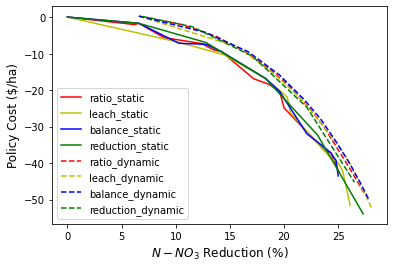

In [5]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['policy_cost'], color = 'r', label = 'ratio_static')
ax.plot(leach_1_dt['L_change'], leach_1_dt['policy_cost'], color = 'y', label = 'leach_static')
ax.plot(bal_1_dt['L_change'], bal_1_dt['policy_cost'], color = 'b', label = 'balance_static')
ax.plot(nred_1_dt['L_change'], nred_1_dt['policy_cost'], color = 'g', label = 'reduction_static')

ax.plot(ratio_2_dt['L_change'], ratio_2_dt['policy_cost'], linestyle='dashed', color = 'r',  label = 'ratio_dynamic')
ax.plot(leach_2_dt['L_change'], leach_2_dt['policy_cost'], linestyle='dashed', color = 'y', label = 'leach_dynamic')
ax.plot(bal_2_dt['L_change'], bal_2_dt['policy_cost'], linestyle='dashed', color = 'b', label = 'balance_dynamic')
ax.plot(nred_2_dt['L_change'], nred_2_dt['policy_cost'], linestyle='dashed', color = 'g', label = 'reduction_dynamic')


plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Policy Cost ($/ha)", size = 12)
#ax.set_xticks((np.arange(0, 30, 2)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policy_cost.pdf"
plt.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policy_cost.png"
plt.savefig(plot_file_name, dpi=300)